In [55]:
from textblob import TextBlob
import pandas as pd
pd.set_option('display.max_rows', 200)

cleaned_proposals = pd.read_parquet("output_data/snapshot/cleaned_proposals.parquet")
forum_topics = pd.read_parquet("output_data/forum/topics.parquet")

proposal_merged_df = pd.merge(
    cleaned_proposals, forum_topics, left_on="forum_topic_id", right_on="id", suffixes=('_proposal', '_topic')
)

posts = pd.read_parquet("output_data/forum/posts.parquet")


merged_df = pd.merge(
    proposal_merged_df, posts, left_on="forum_topic_id", right_on="topic_id", how="inner", suffixes=('_', '_post')
)
# df = merged_df[merged_df["topic_id"] == 20957]
df = merged_df[["id_proposal", "title_proposal", "votes", "scores_total", "selected_choice", "forum_topic_id", "id", "raw"]]
print(df.info())
# print(merged_df[merged_df["topic_id"] == 20957]["raw"])


# column_names_list = list(merged_df.columns)
# column_names_list

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4834 entries, 0 to 4833
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_proposal      4834 non-null   object 
 1   title_proposal   4834 non-null   object 
 2   votes            4834 non-null   int64  
 3   scores_total     4834 non-null   float64
 4   selected_choice  4834 non-null   object 
 5   forum_topic_id   4834 non-null   int64  
 6   id               4834 non-null   int64  
 7   raw              4834 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 302.3+ KB
None


In [57]:
# TODO: add data cleaning(remove html tag)

# Apply sentiment analysis to each record and split the results into two columns: 'polarity' and 'subjectivity'
df[['polarity', 'subjectivity']] = df['raw'].apply(lambda x: pd.Series(TextBlob(x).sentiment))

sentiment_by_proposal = df.groupby(['id_proposal', 'title_proposal', "votes", "scores_total", "selected_choice", "forum_topic_id"])[['polarity', 'subjectivity']].mean().reset_index()

sentiment_by_proposal.to_csv("analytics/sentiment_by_proposal.csv", index=False)
# low = average_polarity[average_polarity['polarity'] == average_polarity['polarity'].min()]



# df.head()
# average_polarity = df['polarity'].mean()
# print(average_polarity)
# average_subjectivity = df['subjectivity'].mean()
# print(average_subjectivity)

# Perform sentiment analysis
# blob = TextBlob(posts["raw"].iloc[0])
# sentiment = blob.sentiment

# print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

/var/folders/gl/3nbwj5r1183_gfp3xql0hclr0000gn/T/ipykernel_8133/2931585712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['polarity', 'subjectivity']] = df['raw'].apply(lambda x: pd.Series(TextBlob(x).sentiment))


## Visualize 

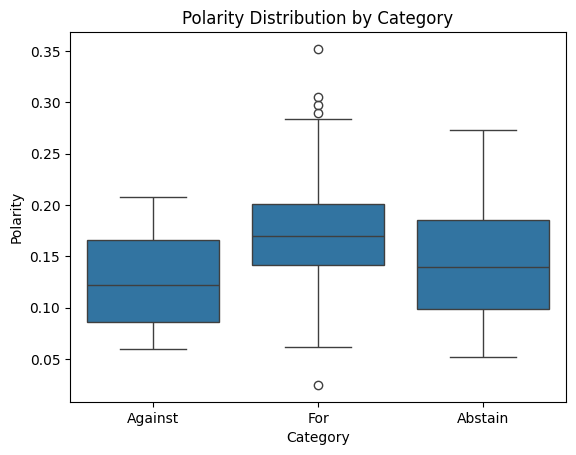

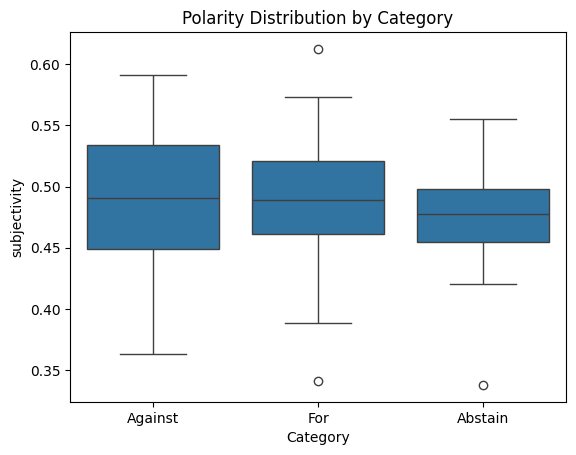

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('analytics/sentiment_by_proposal.csv')

df = df[df["selected_choice"].isin(['For', 'Against', 'Abstain'])]

# Create a boxplot
sns.boxplot(x='selected_choice', y='polarity', data=df)

# Set plot title and labels (optional)
plt.title('Polarity Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Polarity')

# Display the plot
plt.show()

# Create a boxplot
sns.boxplot(x='selected_choice', y='subjectivity', data=df)

# Set plot title and labels (optional)
plt.title('Polarity Distribution by Category')
plt.xlabel('Category')
plt.ylabel('subjectivity')

# Display the plot
plt.show()